In [1]:
# only for 10 qubits
# find best layout for original circuit, then find the corresponding sublayouts needed 
#and check the score (from mapomatic)for various threshold variants of the circuit.
#JSON will have results of scores of range of ghz state (say 13 to 17 qubit ghz state) 
# 2 steps of the code: best scores, then plot best fidelities of them: look like same as 6 sep
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import PassManager

service = QiskitRuntimeService()

In [2]:
def get_ghz_circ_static(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

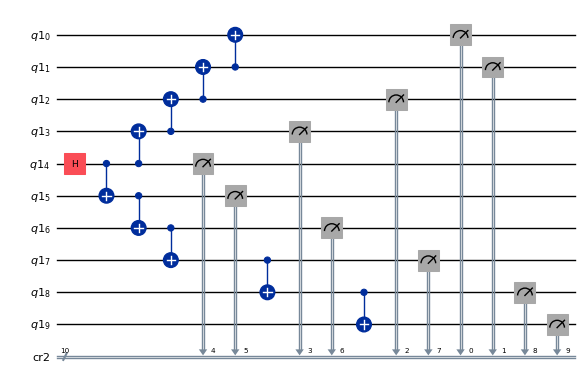

In [3]:
qc = get_ghz_circ_static(num_qubit=10)
qc.draw("mpl",scale=0.5)


In [4]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def get_ghz_circ_dynamic_2(num_qubit):
    qc=get_ghz_circ_static(num_qubit)
    aer_sim = AerSimulator()
    #real_backend = service.backend("ibm_brisbane")
    #aer = AerSimulator.from_backend(real_backend)
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse")
    pm_1 = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse_1")
    pm_2 = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse_2")
    pm_3 = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse_3")
    #pm_4 = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse_4")
    #pm_5 = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse_5")
    transpiled_qc = pm.run(qc)
    transpiled_qc_1 = pm_1.run(qc)
    transpiled_qc_2 = pm_2.run(qc)
    transpiled_qc_3 = pm_3.run(qc)
    #transpiled_qc_4 = pm_4.run(qc)
    #transpiled_qc_5 = pm_5.run(qc)
    
    #return transpiled_qc, transpiled_qc_1, transpiled_qc_2, transpiled_qc_3, transpiled_qc_4, transpiled_qc_5
    return transpiled_qc, transpiled_qc_1,transpiled_qc_2, transpiled_qc_3

In [6]:
qc_list=[]
qc_list.append(get_ghz_circ_static(num_qubit=10))
l=get_ghz_circ_dynamic_2(num_qubit=10)
for i in range(4):
    qc_list.append(l[i])
    

threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in Greedy is 1
classical registers are [ClassicalRegister(10, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(10, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(10, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(10, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(10, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(10, 'cr2')]


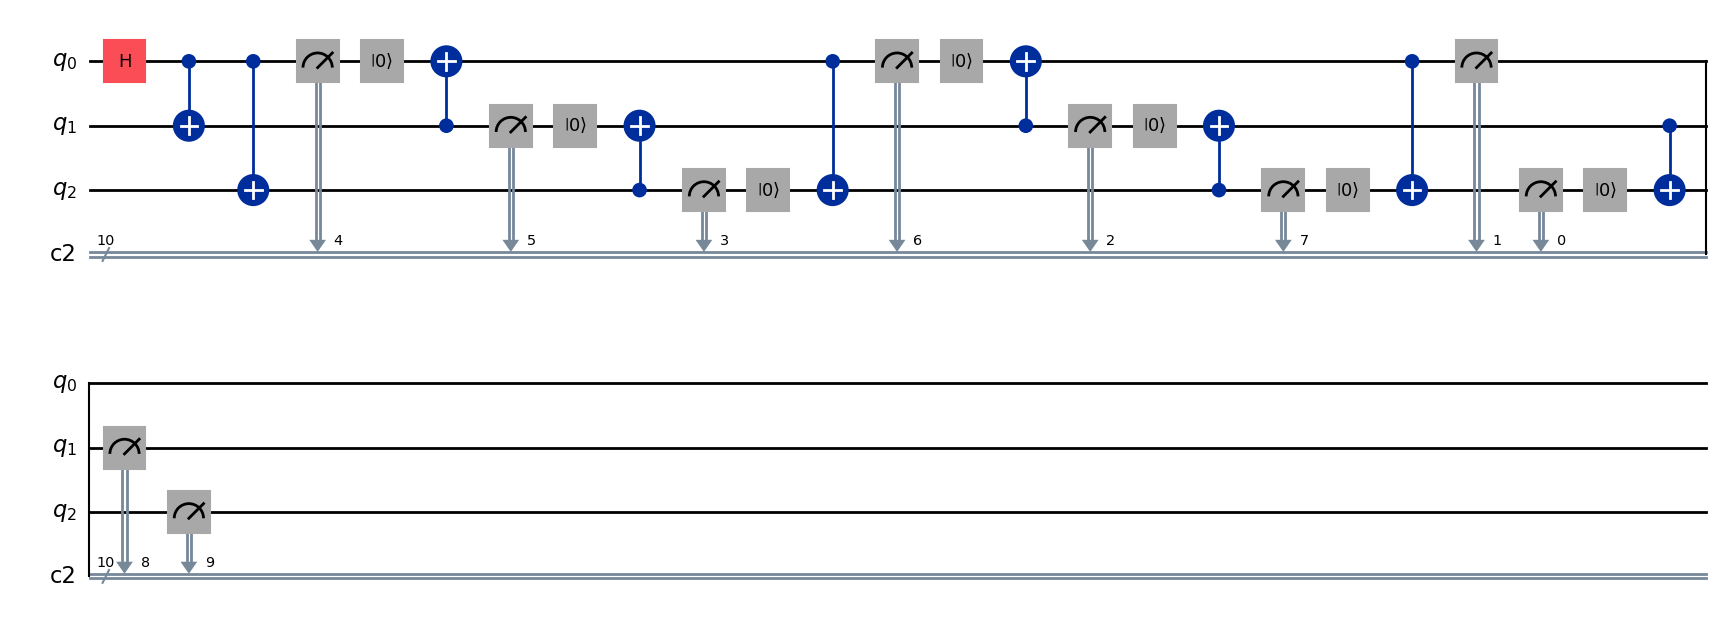

In [7]:
qc_list[1].draw("mpl",idle_wires=False)      # without threshold 3 qubits

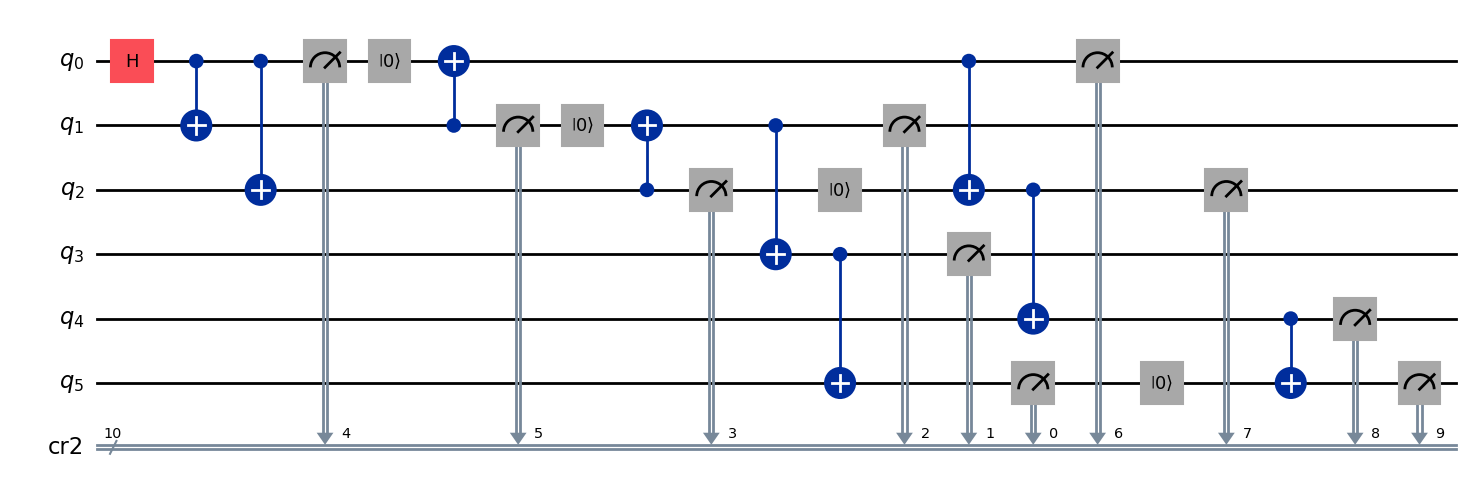

In [8]:
qc_list[2].draw("mpl",idle_wires=False)       # reuse 1 , 6 qubits

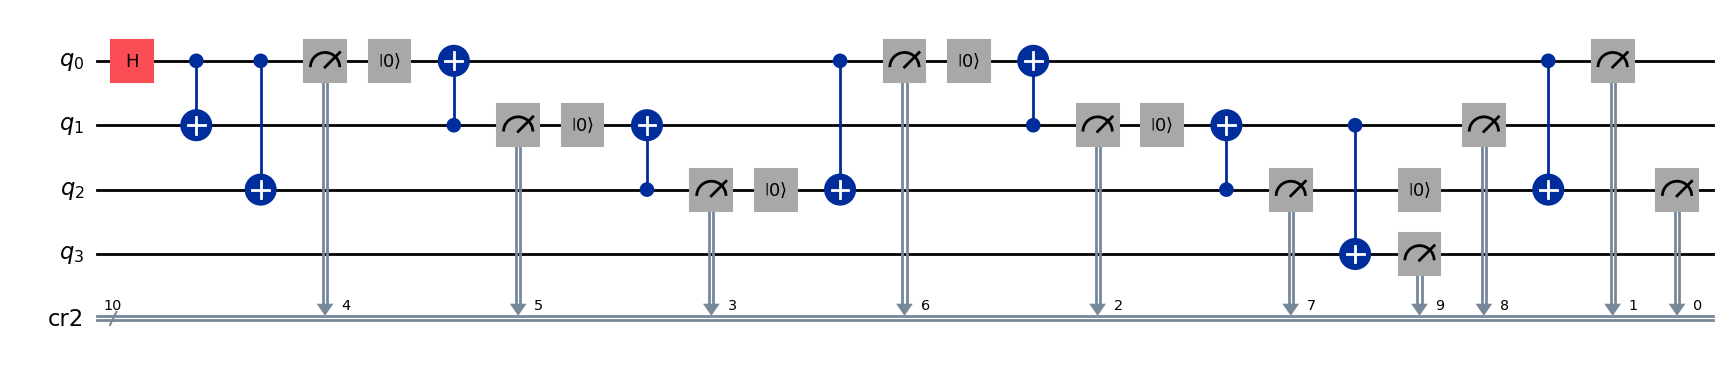

In [9]:
qc_list[3].draw("mpl",idle_wires=False)       # reuse 2, 4 qubits

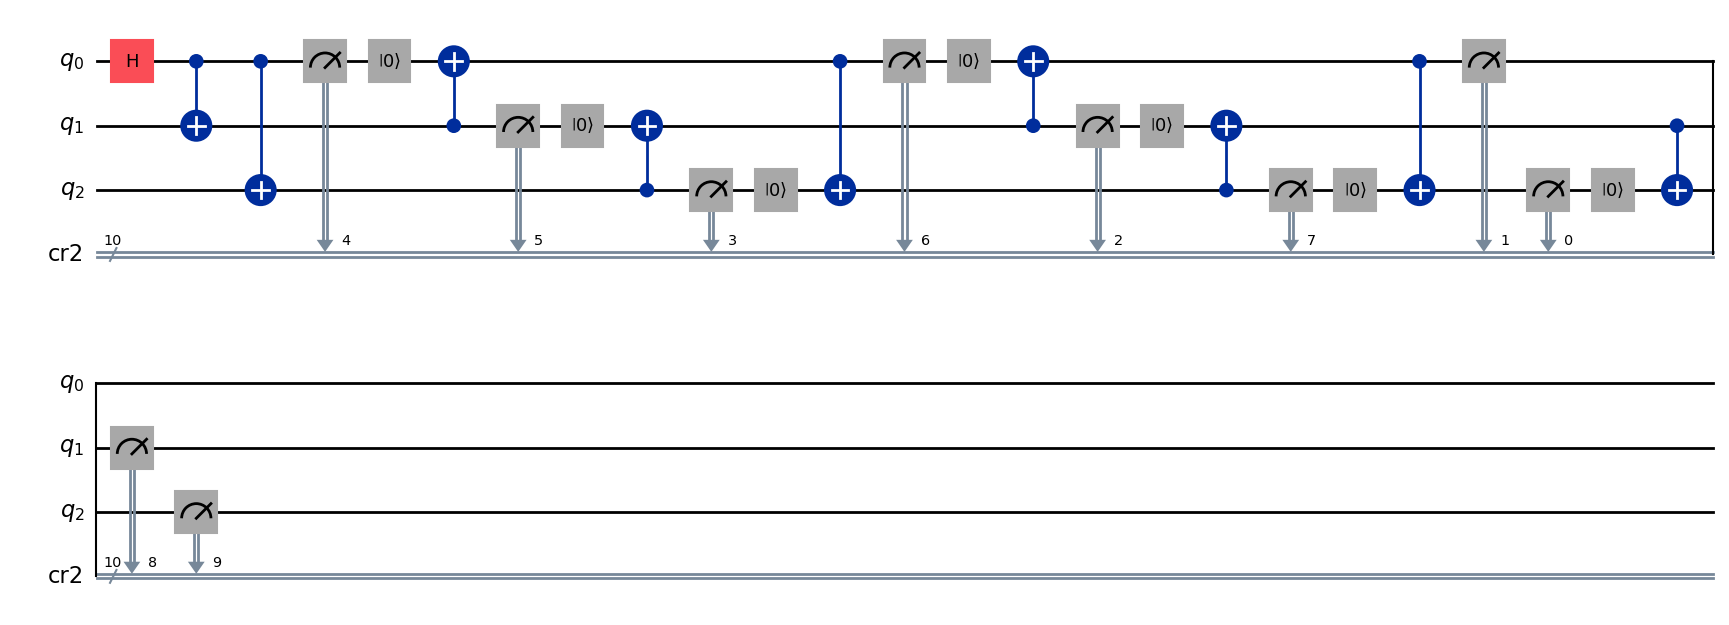

In [10]:
qc_list[4].draw("mpl",idle_wires=False)    # reuse 3, 3 qubits

In [11]:

#work of mapomatic begins for original circuits

import numpy as np
#from qiskit import QuantumCircuit, transpile
import mapomatic as mm
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
real_backend = service.backend("ibm_brisbane")
aer = AerSimulator.from_backend(real_backend)
pm = generate_preset_pass_manager(optimization_level=3, backend=aer)
trans_qc_list = pm.run(qc_list)





"""
trans_qc_list[0].draw('mpl', idle_wires=False)

small_qc = mm.deflate_circuit(trans_qc_original_list[0])

small_qc.draw('mpl')

layouts = mm.matching_layouts(small_qc, aer)

scores = mm.evaluate_layouts(small_qc, layouts, aer)
"""

#best_qc = transpile(small_qc, backend, initial_layout=scores[0][0])

"\ntrans_qc_list[0].draw('mpl', idle_wires=False)\n\nsmall_qc = mm.deflate_circuit(trans_qc_original_list[0])\n\nsmall_qc.draw('mpl')\n\nlayouts = mm.matching_layouts(small_qc, aer)\n\nscores = mm.evaluate_layouts(small_qc, layouts, aer)\n"

In [12]:
small_qc_list=[]
layouts_list=[]
scores_list=[]
best_score_list_before_optimization=[]          # optimization means our way of selecting sublayouts then using mapomatic
for i in range(5):
    small_qc = mm.deflate_circuit(trans_qc_list[i])
    small_qc_list.append(small_qc)
    layouts = mm.matching_layouts(small_qc, aer)
    layouts_list.append(layouts)
    scores = mm.evaluate_layouts(small_qc, layouts, aer)
    scores_list.append(scores)
    best_score_list_before_optimization.append(scores[0][1])

In [13]:
# function to create sublayouts of layouts
from itertools import combinations

def generate_sublayouts(layout, size):
    # Generate combinations and convert each to a list
    return [list(combo) for combo in combinations(layout, size)]

# Example usage
layout = [1, 4, 6, 8]
size = 3
sublayouts = generate_sublayouts(layout, size)
print(sublayouts)

[[1, 4, 6], [1, 4, 8], [1, 6, 8], [4, 6, 8]]


In [14]:
# creating list of sublayouts corresponding to different circuits
import numpy as np
#from qiskit import QuantumCircuit, transpile
import mapomatic as mm
num_qubits=[10,3,6,4,3]
sublayouts_list=[]      

for i in range(5):
    sublayouts=generate_sublayouts(scores_list[0][0][0], num_qubits[i])
    #print(sublayouts)
    sublayouts_list.append(sublayouts)
    


In [14]:
len(sublayouts_list[1][0])

3

In [15]:
sublayouts_list[2]

[[64, 65, 66, 73, 80, 81],
 [64, 65, 66, 73, 80, 82],
 [64, 65, 66, 73, 80, 83],
 [64, 65, 66, 73, 80, 84],
 [64, 65, 66, 73, 80, 85],
 [64, 65, 66, 73, 81, 82],
 [64, 65, 66, 73, 81, 83],
 [64, 65, 66, 73, 81, 84],
 [64, 65, 66, 73, 81, 85],
 [64, 65, 66, 73, 82, 83],
 [64, 65, 66, 73, 82, 84],
 [64, 65, 66, 73, 82, 85],
 [64, 65, 66, 73, 83, 84],
 [64, 65, 66, 73, 83, 85],
 [64, 65, 66, 73, 84, 85],
 [64, 65, 66, 80, 81, 82],
 [64, 65, 66, 80, 81, 83],
 [64, 65, 66, 80, 81, 84],
 [64, 65, 66, 80, 81, 85],
 [64, 65, 66, 80, 82, 83],
 [64, 65, 66, 80, 82, 84],
 [64, 65, 66, 80, 82, 85],
 [64, 65, 66, 80, 83, 84],
 [64, 65, 66, 80, 83, 85],
 [64, 65, 66, 80, 84, 85],
 [64, 65, 66, 81, 82, 83],
 [64, 65, 66, 81, 82, 84],
 [64, 65, 66, 81, 82, 85],
 [64, 65, 66, 81, 83, 84],
 [64, 65, 66, 81, 83, 85],
 [64, 65, 66, 81, 84, 85],
 [64, 65, 66, 82, 83, 84],
 [64, 65, 66, 82, 83, 85],
 [64, 65, 66, 82, 84, 85],
 [64, 65, 66, 83, 84, 85],
 [64, 65, 73, 80, 81, 82],
 [64, 65, 73, 80, 81, 83],
 

In [15]:
# function for finding tuple which has minimum score, return scores (tuple of layout, score)
def foo(s):
    # Find the tuple with the minimum score using the min function with a custom key
    return min(s, key=lambda x: x[1])

# Example usage
s = [([1, 4, 6], 10), ([1, 4, 8], 5), ([1, 6, 8], 0.5), ([4, 6, 8,9], 3)]
result = foo(s)
print(result)

([1, 6, 8], 0.5)


In [16]:
#optimizing score 
optimum_sublayout_list=[]
optimum_score_list=[]
import numpy as np
from qiskit import QuantumCircuit, transpile
import mapomatic as mm
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
real_backend = service.backend("ibm_brisbane")
aer = AerSimulator.from_backend(real_backend)
for i in range(5):
    various_top_scores=[]
    top_score=[]
    print("0")
    for l in sublayouts_list[i]:
        #pm = generate_preset_pass_manager(optimization_level=3, backend=aer, initial_layout=l)
        print("1")
        best_qc = transpile(small_qc_list[i], aer, initial_layout=l)
        print("2")
        #trans_qc = pm.run(qc_list[i])
        small_qc= mm.deflate_circuit(best_qc)
        print("3")
        layouts = mm.matching_layouts(small_qc, aer)
       
        print("4")
        scores = mm.evaluate_layouts(small_qc, layouts, aer)
        print("5")
        top_score.append(scores[0])
        print("6")
    x=foo(top_score)
    print("7")
    various_top_scores.append(x)
    print("8")
    optimum_sublayout_list.append(x[0])
    print("9")
    optimum_score_list.append(x[1])
    print("10")

print(len(various_top_scores))






0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
0
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


3
4
5
6
1
2
3


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1
2


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1
2
3
4


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1
2
3


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'


2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1


ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse2PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_5_normal': module 'qiskit_qubit_reuse_5.plugin' has no attribute 'QubitReuse5PluginNormal'
ERROR:stevedore.extension:Could not load 'qubit_reuse_2_normal': module 'qiskit_qubit_reuse_2.plugin' has no attribute 'QubitReuse

2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
1


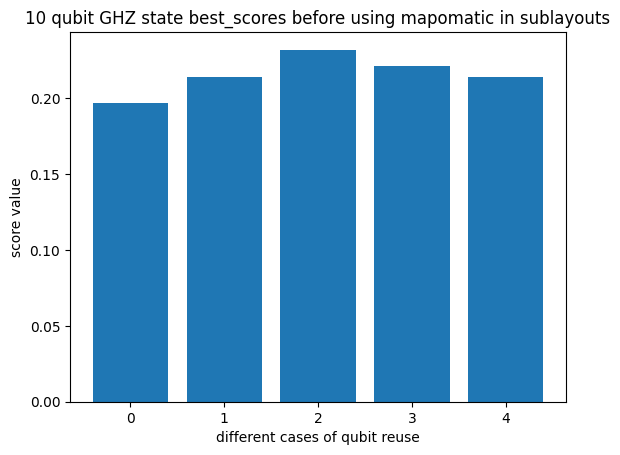

In [17]:
# optimum_score_list, qubit reuse case =[0,1,2,3,4,5,6]
# best_score_list_before_optimization, qubit reuse case =[0,1,2,3,4,5,6]

import matplotlib.pyplot as plt


x=[0,1,2,3,4]
# Create bar plot
        
plt.bar(x, best_score_list_before_optimization)

# Add title and labels
plt.title('10 qubit GHZ state best_scores before using mapomatic in sublayouts')
plt.xlabel('different cases of qubit reuse')
plt.ylabel('score value')

# Show plot
plt.show()

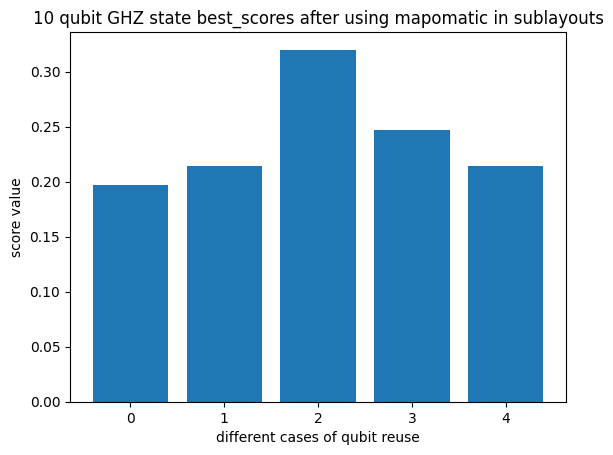

In [18]:
plt.bar(x, optimum_score_list)

# Add title and labels
plt.title('10 qubit GHZ state best_scores after using mapomatic in sublayouts')
plt.xlabel('different cases of qubit reuse')
plt.ylabel('score value')

# Show plot
plt.show()

In [19]:
print(optimum_score_list)

[0.1969266854672448, 0.2139093614016193, 0.3199313167996056, 0.24657888472555078, 0.2139093614016193]


In [20]:
best_score_list_before_optimization

[0.1969266854672448,
 0.2140254839991279,
 0.2320932488556312,
 0.2213837634400303,
 0.2140254839991279]